In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.insert(0, '..')

%matplotlib inline
sns.set()

In [3]:
import glob

In [14]:
no_kaf = '../logs/darnn/ntsa-2018-12-21-22-14-03/'
kaf_time = '../logs/darnn/ntsa-2018-12-21-22-14-19/'
kaf_input = '../logs/darnn/ntsa-2018-12-21-22-14-39/'
kaf_dual = '../logs/darnn/ntsa-2018-12-21-22-14-59/'

In [15]:
df_no_kaf = pd.read_csv(no_kaf + 'train/results.csv')
df_kaf_time = pd.read_csv(kaf_time + '/train/results.csv')
df_kaf_input = pd.read_csv(kaf_input + '/train/results.csv')
df_kaf_dual = pd.read_csv(kaf_dual + '/train/results.csv')

In [16]:
def smooth(x,w=0.5):
    p = x[0]
    xs = []
    for d in x:
        p = p * w + (1-w) * d
        xs.append(p)
    return np.array(xs)

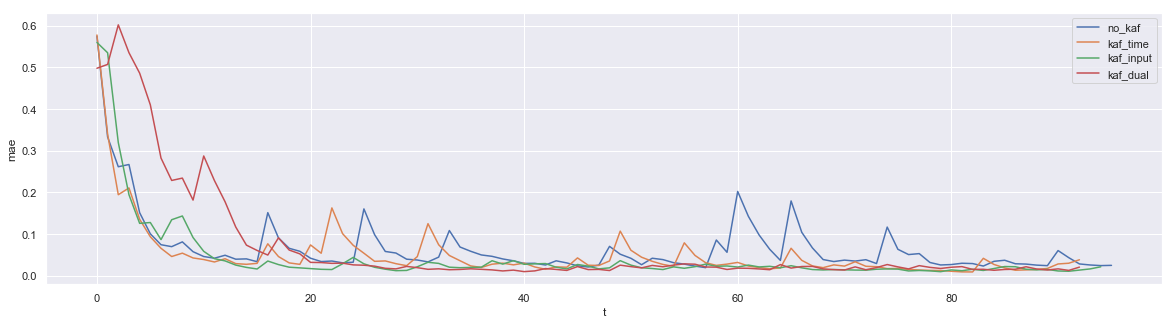

In [17]:
fig,ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(smooth(df_no_kaf.loss.values))
ax.plot(smooth(df_kaf_time.loss.values))
ax.plot(smooth(df_kaf_input.loss.values))
ax.plot(smooth(df_kaf_dual.loss.values))
plt.ylabel('mae')
plt.xlabel('t')
plt.legend(['no_kaf','kaf_time','kaf_input', 'kaf_dual'])

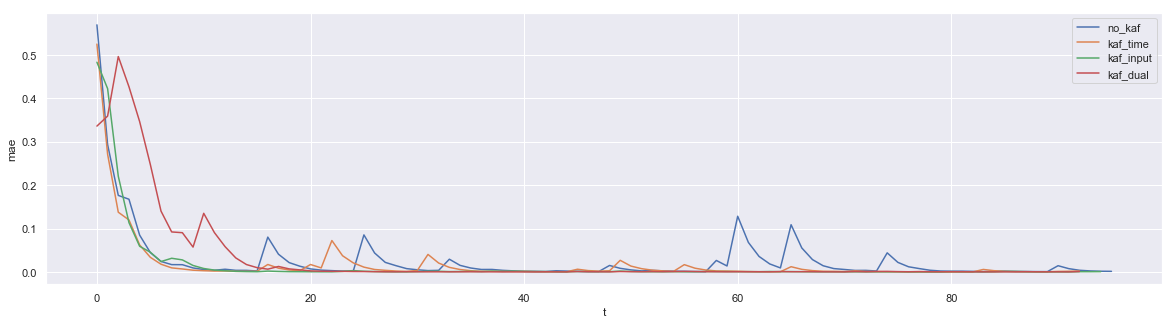

In [18]:
fig,ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(smooth(df_no_kaf.mse.values))
ax.plot(smooth(df_kaf_time.mse.values))
ax.plot(smooth(df_kaf_input.mse.values))
ax.plot(smooth(df_kaf_dual.mse.values))
plt.ylabel('mae')
plt.xlabel('t')
plt.legend(['no_kaf','kaf_time','kaf_input', 'kaf_dual'])

In [19]:

rows = ['no_kaf','kaf_time','kaf_input', 'kaf_dual']

table = pd.concat([df_no_kaf.mean(axis=0), df_kaf_time.mean(axis=0), df_kaf_input.mean(axis=0), df_kaf_dual.mean(axis=0)], axis=1)
table.columns = rows

table.T

,loss,norm,mse,mae,smape,rmse,mape
no_kaf,0.060217,8.252080,0.021028,0.060217,0.106904,0.060217,85.688009
kaf_time,0.044545,10.188401,0.012361,0.044545,0.083214,0.044545,59.185291
kaf_input,0.037081,14.531173,0.010994,0.037081,0.060097,0.037081,27.118644
kaf_dual,0.064829,13.977077,0.028829,0.064829,0.111903,0.064829,73.956467


In [9]:
header = table.index.tolist()

In [20]:
df_no_kaf = pd.read_csv(no_kaf + 'test/results.csv', names=header)
df_kaf_time = pd.read_csv(kaf_time + '/test/results.csv', names=header)
df_kaf_input = pd.read_csv(kaf_input + '/test/results.csv', names=header)
df_kaf_dual = pd.read_csv(kaf_dual+ '/test/results.csv', names=header)

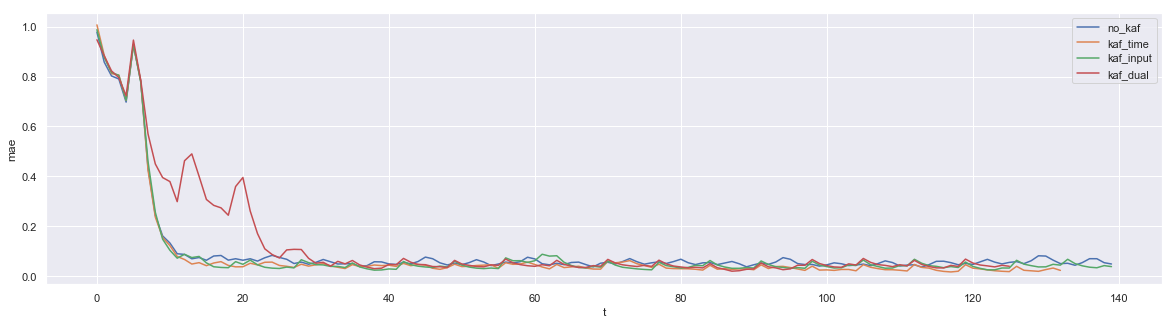

In [21]:
fig,ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(smooth(df_no_kaf.loss.values))
ax.plot(smooth(df_kaf_time.loss.values))
ax.plot(smooth(df_kaf_input.loss.values))
ax.plot(smooth(df_kaf_dual.loss.values))
plt.ylabel('mae')
plt.xlabel('t')
plt.legend(['no_kaf','kaf_time','kaf_input', 'kaf_dual'])

In [22]:
table = pd.concat([df_no_kaf.mean(axis=0), df_kaf_time.mean(axis=0), df_kaf_input.mean(axis=0), df_kaf_dual.mean(axis=0)], axis=1)
table.columns = rows

In [23]:
table.T

,loss,norm,mse,mae,smape,rmse,mape
no_kaf,0.094290,7.880033,0.054663,0.094290,0.161316,0.094290,34.822246
kaf_time,0.079212,9.209194,0.072082,0.079212,0.130517,0.079212,23.840309
kaf_input,0.083202,11.013008,0.096254,0.083202,0.116733,0.083202,16.780614
kaf_dual,0.124689,12.367093,0.115685,0.124689,0.179042,0.124689,36.737538


In [30]:
df_no_kaf = pd.read_csv(no_kaf + '/report/89699_report.csv', index_col=0)
df_kaf_time = pd.read_csv(kaf_time + '/report/84996_report.csv', index_col=0)
df_kaf_input = pd.read_csv(kaf_input + '/report/89729_report.csv', index_col=0)
df_kaf_dual = pd.read_csv(kaf_dual + '/report/89741_report.csv', index_col=0)

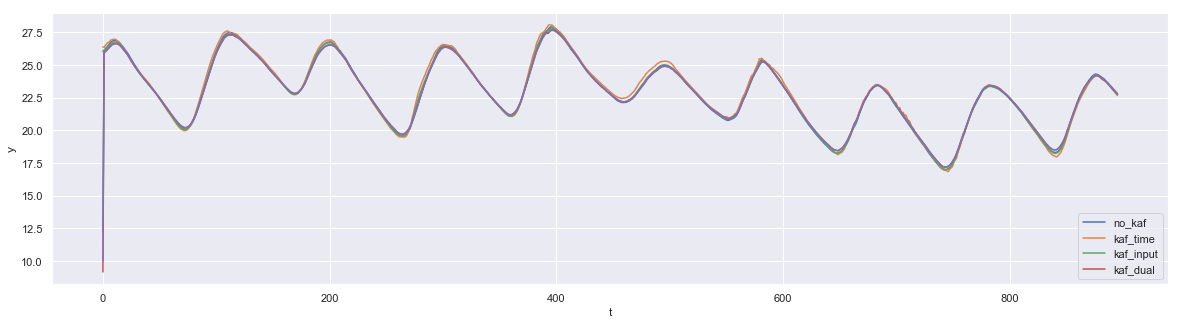

In [31]:
fig,ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(df_no_kaf.y.values)
ax.plot(df_no_kaf.y_hat.values)
ax.plot(df_kaf_time.y_hat.values)
ax.plot(df_kaf_input.y_hat.values)
ax.plot(df_kaf_dual.y_hat.values)
plt.ylabel('y')
plt.xlabel('t')
plt.legend(['no_kaf','kaf_time','kaf_input', 'kaf_dual'])

In [32]:
from ntsa.utils.misc import regr_metrics

In [33]:
y = df_no_kaf.y.values
y_no_kaf = df_no_kaf.y_hat.values
y_kaf_time = df_kaf_time.y_hat.values
y_kaf_input = df_kaf_input.y_hat.values
y_kaf_dual = df_kaf_dual.y_hat.values

In [34]:
metrics = [
list(regr_metrics(y, y_no_kaf).values()),
list(regr_metrics(y, y_kaf_time).values()),
list(regr_metrics(y, y_kaf_input).values()),
list(regr_metrics(y, y_kaf_dual).values())
]

In [35]:
pd.DataFrame(np.array(metrics), index=['no_kaf', 'time', 'input', 'dual'], columns=['mse', 'mae', 'smape', 'mape'])

,mse,mae,smape,mape
no_kaf,0.037219,0.142866,0.006231,0.621968
time,0.216569,0.070516,0.003176,0.363191
input,0.330617,0.111454,0.005210,0.620401
dual,0.303129,0.120180,0.005516,0.632747
